<a href="https://colab.research.google.com/github/ohsosunny/actuarial/blob/main/Private_Passenger_Auto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Passenger Private Auto data from https://www.casact.org/publications-research/research/research-resources/loss-reserving-data-pulled-naic-schedule-p

Data is a squared triange, where the lower triangle could be used to validate any modeling on the upper triangle.

First install the chainladder package

In [1]:
pip install chainladder

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 14.4 MB/s eta 0:00:00


In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import chainladder as cl
import seaborn as sns

print("chainladder", cl.__version__)

chainladder 0.8.18


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ppauto_df = pd.read_csv("/content/drive/My Drive/Actuarial/ppauto_pos.csv")

## Data Exploration

In [5]:
ppauto_df.head()

,GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
0,43,IDS Property Cas Ins Co,1988,1988,1,607,133,226,957,62,895,0,73044
1,43,IDS Property Cas Ins Co,1988,1989,2,647,333,129,957,62,895,0,73044
2,43,IDS Property Cas Ins Co,1988,1990,3,582,431,38,957,62,895,0,73044
3,43,IDS Property Cas Ins Co,1988,1991,4,598,570,19,957,62,895,0,73044
4,43,IDS Property Cas Ins Co,1988,1992,5,614,615,0,957,62,895,0,73044


In [6]:
ppauto_df.shape

(14600, 13)

In [7]:
ppauto_df['GRNAME'].unique()

array(['IDS Property Cas Ins Co', 'Public Underwriters Grp',
       'Celina Mut Grp', 'Federal Ins Co Grp', 'Buckeye Ins Grp',
       'Employers Mut Co Of Des Moines', 'Farm Bureau Of MI Grp',
       'Wawanesa Ins Grp', 'West Bend Mut Ins Grp', 'Secura Ins Co',
       'Island Ins Cos Grp', 'Kentucky Farm Bureau Mut Ins Grp',
       'Penn Miller Grp', 'American Modern Ins Grp Inc',
       'Farmers Automobile Grp', 'Germania Ins Grp', 'State Farm Mut Grp',
       'United Services Automobile Asn Grp',
       'Farmers Alliance Mut & Affiliates', 'Oklahoma Farm Grp',
       'Occidental Fire & Cas Co Grp', 'Aegis Grp',
       'NC Farm Bureau Ins Grp', 'Florists Mut Ins Grp',
       'FL Farm Bureau Grp', 'Grinnell Mut Grp', 'Cameron Mut Grp',
       'Farmers Mtl Hail Ins Co Of Ia Grp', 'Amerisafe Grp',
       'Tenn Farmers Mut', 'New Jersey Manufacturers Grp', 'Star Ins Grp',
       'Pennsylvania Mfg Asn Ins Co', 'Farm Bureau Grp',
       'Millers Mut Ins Assoc', 'Protective Ins Grp', 'Lumber

In [8]:
ppauto_df['GRNAME'].nunique()

146

In [9]:
ppauto_df[['AccidentYear', 'DevelopmentYear', 'DevelopmentLag']].drop_duplicates().head(11)

,AccidentYear,DevelopmentYear,DevelopmentLag
0,1988,1988,1
1,1988,1989,2
2,1988,1990,3
3,1988,1991,4
4,1988,1992,5
5,1988,1993,6
6,1988,1994,7
7,1988,1995,8
8,1988,1996,9
9,1988,1997,10


In [10]:
ppauto_df.describe()

,GRCODE,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_B,CumPaidLoss_B,BulkLoss_B,EarnedPremDIR_B,EarnedPremCeded_B,EarnedPremNet_B,Single,PostedReserve97_B
count,14600.000000,14600.00000,14600.000000,14600.00000,1.460000e+04,1.460000e+04,1.460000e+04,1.460000e+04,14600.000000,1.460000e+04,14600.000000,1.460000e+04
mean,18162.013699,1992.50000,1997.000000,5.50000,8.351644e+04,7.207015e+04,5.500457e+03,1.108998e+05,4323.291781,1.065765e+05,0.746575,1.269919e+05
std,12698.810114,2.87238,4.062158,2.87238,7.806727e+05,6.911359e+05,9.914037e+04,1.017305e+06,19912.058503,9.998495e+05,0.434987,1.131769e+06
min,43.000000,1988.00000,1988.000000,1.00000,-8.000000e+00,-5.900000e+01,-7.500000e+02,-1.000000e+01,-2808.000000,-5.100000e+01,0.000000,0.000000e+00
25%,9466.000000,1990.00000,1994.000000,3.00000,1.420000e+02,1.090000e+02,0.000000e+00,3.307500e+02,0.000000,1.952500e+02,0.000000,7.150000e+02
50%,14954.500000,1992.50000,1997.000000,5.50000,1.940000e+03,1.650500e+03,0.000000e+00,4.113000e+03,443.000000,2.889500e+03,1.000000,3.443500e+03
75%,27766.000000,1995.00000,2000.000000,8.00000,8.767250e+03,7.314250e+03,5.200000e+01,1.429075e+04,1914.500000,1.114725e+04,1.000000,1.242600e+04
max,43494.000000,1997.00000,2006.000000,10.00000,1.169300e+07,1.051211e+07,3.830524e+06,1.506571e+07,313122.000000,1.492338e+07,1.000000,1.359348e+07


In [12]:
ppauto_df.rename(columns={'IncurLoss_B': 'IncurLoss',
                          'CumPaidLoss_B': 'CumPaidLoss',
                          'BulkLoss_B': 'BulkLoss',
                          'EarnedPremDIR_B': 'EarnedPremDIR',
                          'EarnedPremCeded_B': 'EarnedPremCeded',
                          'EarnedPremNet_B': 'EarnedPremNet'},
                 inplace=True)

upper triangle only

In [13]:
ppauto_tri_df = ppauto_df[ppauto_df['DevelopmentYear']<=1997]

In [14]:
ppauto_tri = cl.Triangle(
    data=ppauto_tri_df,
    origin='AccidentYear',
    development='DevelopmentYear',
    columns=['IncurLoss','CumPaidLoss','BulkLoss','EarnedPremDIR','EarnedPremCeded','EarnedPremNet'],
    cumulative=True,
    index=['GRNAME']
)

In [15]:
ppauto_tri

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(146, 6, 10, 10)"
Index:,[GRNAME]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


In [16]:
ppauto_tri['IncurLoss']

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(146, 1, 10, 10)"
Index:,[GRNAME]
Columns:,[IncurLoss]


In [17]:
ppauto_tri['IncurLoss'].sum().latest_diagonal

,1997
1988,"8,723,062"
1989,"9,860,747"
1990,"10,795,387"
1991,"10,825,784"
1992,"11,806,897"
1993,"12,772,186"
1994,"13,721,867"
1995,"14,008,237"
1996,"14,000,714"
1997,"14,256,459"


In [18]:
# Identify the largest commercial auto carriers (by premium) for 1997
top_10 = ppauto_tri['EarnedPremDIR'].groupby('GRNAME').sum().latest_diagonal.loc[..., '1997', :].to_frame().nlargest(10)
top_10

GRNAME
State Farm Mut Grp                    15065713.0
United Services Automobile Asn Grp     2205233.0
FL Farm Bureau Grp                      554489.0
New Jersey Manufacturers Grp            358511.0
NC Farm Bureau Ins Grp                  222032.0
Kentucky Farm Bureau Mut Ins Grp        184623.0
Tenn Farmers Mut                        170183.0
Federal Ins Co Grp                      167862.0
Home State Cnty Mut Ins Co              140365.0
Public Underwriters Grp                 131650.0
dtype: float64

In [19]:
# Group any companies together that are not in the top 10
ppauto_tri = ppauto_tri.groupby(ppauto_tri.index['GRNAME'].map(lambda x: x if x in top_10.index else 'Remainder')).sum()

In [20]:
ppauto_tri

,Triangle Summary
Valuation:,1997-12
Grain:,OYDY
Shape:,"(11, 6, 10, 10)"
Index:,[GRNAME]
Columns:,"[IncurLoss, CumPaidLoss, BulkLoss, EarnedPremDIR, EarnedPremCeded, EarnedPremNet]"


In [29]:
ppauto_tri['EarnedPremDIR'].groupby('GRNAME').sum().latest_diagonal.loc[..., '1997', :].to_frame().sort_values(ascending=False)

GRNAME
State Farm Mut Grp                    15065713.0
United Services Automobile Asn Grp     2205233.0
Remainder                              1706705.0
FL Farm Bureau Grp                      554489.0
New Jersey Manufacturers Grp            358511.0
NC Farm Bureau Ins Grp                  222032.0
Kentucky Farm Bureau Mut Ins Grp        184623.0
Tenn Farmers Mut                        170183.0
Federal Ins Co Grp                      167862.0
Home State Cnty Mut Ins Co              140365.0
Public Underwriters Grp                 131650.0
dtype: float64

In [31]:
ppauto_tri[ppauto_tri['GRNAME']=='State Farm Mut Grp']['IncurLoss'].link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1988,1.0053,0.9966,0.9977,0.9962,0.9990,0.9951,0.9991,0.9998,0.9996
1989,0.9932,0.9956,0.9956,0.9963,0.9967,0.9956,0.9997,1.0002,
1990,0.9745,0.9868,0.9916,0.9938,0.9941,0.9951,1.0000,,
1991,0.9757,0.9797,0.9874,0.9895,0.9901,0.9962,,,
1992,0.9714,0.9781,0.9827,0.9845,0.9939,,,,
1993,0.9708,0.9707,0.9788,0.9862,,,,,
1994,0.9636,0.9653,0.9821,,,,,,
1995,0.9485,0.9569,,,,,,,
1996,0.9332,,,,,,,,


In [32]:
ppauto_tri['CumPaidLoss'].sum().link_ratio.heatmap()

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
1988,1.9215,1.2181,1.0955,1.0490,1.0240,1.0108,1.0052,1.0031,1.0009
1989,1.8988,1.2171,1.0972,1.0470,1.0218,1.0109,1.0049,1.0024,
1990,1.8626,1.2162,1.0935,1.0428,1.0197,1.0091,1.0053,,
1991,1.8606,1.2111,1.0923,1.0413,1.0184,1.0096,,,
1992,1.8332,1.2041,1.0851,1.0399,1.0193,,,,
1993,1.8178,1.1934,1.0819,1.0397,,,,,
1994,1.7724,1.1794,1.0824,,,,,,
1995,1.7247,1.1797,,,,,,,
1996,1.6967,,,,,,,,


In [102]:
paid_loss = ppauto_tri['CumPaidLoss'].sum()

## LDF Selection

In [103]:
dev_volume = cl.Development(average='volume').fit(paid_loss)

In [104]:
dev_volume.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8065,1.1999,1.0889,1.0429,1.0205,1.0100,1.0051,1.0027,1.0009


In [107]:
dev_volume.cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult
(All),2.5593,1.4167,1.1806,1.0843,1.0397,1.0189,1.0087,1.0036,1.0009


In [108]:
dev_simple = cl.Development(average='simple').fit(paid_loss)

In [109]:
dev_simple.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.8209,1.2024,1.0897,1.0433,1.0206,1.0101,1.0051,1.0027,1.0009


In [110]:
dev_simple.cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult
(All),2.5886,1.4216,1.1823,1.0850,1.0400,1.0190,1.0088,1.0036,1.0009


In [111]:
dev_3_volume = cl.Development(average='volume', n_periods=3).fit(paid_loss)

In [112]:
dev_3_volume.ldf_

,12-24,24-36,36-48,48-60,60-72,72-84,84-96,96-108,108-120
(All),1.7306,1.1839,1.0831,1.0403,1.0191,1.0098,1.0051,1.0027,1.0009


In [113]:
dev_3_volume.cdf_

,12-Ult,24-Ult,36-Ult,48-Ult,60-Ult,72-Ult,84-Ult,96-Ult,108-Ult
(All),2.3964,1.3847,1.1696,1.0799,1.0382,1.0187,1.0087,1.0036,1.0009


In [114]:
dev_3_volume.transform(paid_loss)

,12,24,36,48,60,72,84,96,108,120
1988,"3,092,818","5,942,711","7,239,089","7,930,109","8,318,795","8,518,201","8,610,355","8,655,509","8,682,451","8,690,036"
1989,"3,556,683","6,753,435","8,219,551","9,018,288","9,441,842","9,647,917","9,753,014","9,800,477","9,823,747",
1990,"4,015,052","7,478,257","9,094,949","9,945,288","10,371,175","10,575,467","10,671,988","10,728,411",,
1991,"4,065,571","7,564,284","9,161,104","10,006,407","10,419,901","10,612,083","10,713,621",,,
1992,"4,551,591","8,344,021","10,047,179","10,901,995","11,336,777","11,555,121",,,,
1993,"5,020,277","9,125,734","10,890,282","11,782,219","12,249,826",,,,,
1994,"5,569,355","9,871,002","11,641,397","12,600,432",,,,,,
1995,"5,803,124","10,008,734","11,807,279",,,,,,,
1996,"5,835,368","9,900,842",,,,,,,,
1997,"5,754,249",,,,,,,,,


In [118]:
ppauto_dev = dev_3_volume.transform(ppauto_tri['CumPaidLoss'])

In [127]:
# ppauto_dev.iloc[0,:,:,:]

,12,24,36,48,60,72,84,96,108,120
1988,"102,260","168,086","190,196","199,058","203,783","204,531","205,280","205,779","205,911","205,921"
1989,"113,438","188,826","211,976","221,104","225,131","226,632","227,314","227,532","227,553",
1990,"128,209","213,190","241,623","253,582","257,674","259,489","259,970","260,062",,
1991,"129,181","218,195","248,903","259,789","264,556","266,188","266,822",,,
1992,"139,085","242,303","271,847","282,231","286,041","288,748",,,,
1993,"154,914","262,070","291,947","303,199","307,179",,,,,
1994,"172,025","291,837","322,487","334,928",,,,,,
1995,"188,892","304,583","337,595",,,,,,,
1996,"191,839","306,832",,,,,,,,
1997,"196,865",,,,,,,,,


In [132]:
# ppauto_dev.to_frame(keepdims=True).pivot_table()

,origin,development,CumPaidLoss
GRNAME,,,
FL Farm Bureau Grp,1988-01-01,12,102260.0
FL Farm Bureau Grp,1988-01-01,24,168086.0
FL Farm Bureau Grp,1988-01-01,36,190196.0
FL Farm Bureau Grp,1988-01-01,48,199058.0
FL Farm Bureau Grp,1988-01-01,60,203783.0
...,...,...,...
United Services Automobile Asn Grp,1995-01-01,24,986025.0
United Services Automobile Asn Grp,1995-01-01,36,1185300.0
United Services Automobile Asn Grp,1996-01-01,12,561687.0


## IBNR Models

In [37]:
# Build IBNR model
clain_ladder_model = cl.Chainladder().fit(paid_loss.sum())

In [38]:
clain_ladder_model

Chainladder()

In [40]:
clain_ladder_model.full_triangle_

,12,24,36,48,60,72,84,96,108,120,132,9999
1988,"3,092,818","5,942,711","7,239,089","7,930,109","8,318,795","8,518,201","8,610,355","8,655,509","8,682,451","8,690,036","8,690,036","8,690,036"
1989,"3,556,683","6,753,435","8,219,551","9,018,288","9,441,842","9,647,917","9,753,014","9,800,477","9,823,747","9,832,329","9,832,329","9,832,329"
1990,"4,015,052","7,478,257","9,094,949","9,945,288","10,371,175","10,575,467","10,671,988","10,728,411","10,757,599","10,766,997","10,766,997","10,766,997"
1991,"4,065,571","7,564,284","9,161,104","10,006,407","10,419,901","10,612,083","10,713,621","10,768,615","10,797,912","10,807,345","10,807,345","10,807,345"
1992,"4,551,591","8,344,021","10,047,179","10,901,995","11,336,777","11,555,121","11,671,193","11,731,102","11,763,018","11,773,294","11,773,294","11,773,294"
1993,"5,020,277","9,125,734","10,890,282","11,782,219","12,249,826","12,500,354","12,625,921","12,690,731","12,725,258","12,736,374","12,736,374","12,736,374"
1994,"5,569,355","9,871,002","11,641,397","12,600,432","13,140,534","13,409,279","13,543,976","13,613,498","13,650,536","13,662,461","13,662,461","13,662,461"
1995,"5,803,124","10,008,734","11,807,279","12,856,535","13,407,615","13,681,822","13,819,257","13,890,191","13,927,982","13,940,149","13,940,149","13,940,149"
1996,"5,835,368","9,900,842","11,880,252","12,935,993","13,490,479","13,766,380","13,904,665","13,976,038","14,014,062","14,026,304","14,026,304","14,026,304"
1997,"5,754,249","10,395,258","12,473,514","13,581,975","14,164,150","14,453,829","14,599,019","14,673,956","14,713,879","14,726,733","14,726,733","14,726,733"


In [82]:
chain_ladder_square_df = clain_ladder_model.full_triangle_.to_frame()
chain_ladder_square_df

,12,24,36,48,60,72,84,96,108,120,132,9999
1988-01-01,3092818.0,5.942711e+06,7.239089e+06,7.930109e+06,8.318795e+06,8.518201e+06,8.610355e+06,8.655509e+06,8.682451e+06,8.690036e+06,8.690036e+06,8.690036e+06
1989-01-01,3556683.0,6.753435e+06,8.219551e+06,9.018288e+06,9.441842e+06,9.647917e+06,9.753014e+06,9.800477e+06,9.823747e+06,9.832329e+06,9.832329e+06,9.832329e+06
1990-01-01,4015052.0,7.478257e+06,9.094949e+06,9.945288e+06,1.037118e+07,1.057547e+07,1.067199e+07,1.072841e+07,1.075760e+07,1.076700e+07,1.076700e+07,1.076700e+07
1991-01-01,4065571.0,7.564284e+06,9.161104e+06,1.000641e+07,1.041990e+07,1.061208e+07,1.071362e+07,1.076861e+07,1.079791e+07,1.080735e+07,1.080735e+07,1.080735e+07
1992-01-01,4551591.0,8.344021e+06,1.004718e+07,1.090200e+07,1.133678e+07,1.155512e+07,1.167119e+07,1.173110e+07,1.176302e+07,1.177329e+07,1.177329e+07,1.177329e+07
1993-01-01,5020277.0,9.125734e+06,1.089028e+07,1.178222e+07,1.224983e+07,1.250035e+07,1.262592e+07,1.269073e+07,1.272526e+07,1.273637e+07,1.273637e+07,1.273637e+07
1994-01-01,5569355.0,9.871002e+06,1.164140e+07,1.260043e+07,1.314053e+07,1.340928e+07,1.354398e+07,1.361350e+07,1.365054e+07,1.366246e+07,1.366246e+07,1.366246e+07
1995-01-01,5803124.0,1.000873e+07,1.180728e+07,1.285653e+07,1.340761e+07,1.368182e+07,1.381926e+07,1.389019e+07,1.392798e+07,1.394015e+07,1.394015e+07,1.394015e+07
1996-01-01,5835368.0,9.900842e+06,1.188025e+07,1.293599e+07,1.349048e+07,1.376638e+07,1.390466e+07,1.397604e+07,1.401406e+07,1.402630e+07,1.402630e+07,1.402630e+07
1997-01-01,5754249.0,1.039526e+07,1.247351e+07,1.358197e+07,1.416415e+07,1.445383e+07,1.459902e+07,1.467396e+07,1.471388e+07,1.472673e+07,1.472673e+07,1.472673e+07


In [83]:
chain_ladder_square_df.index = chain_ladder_square_df.index.year
chain_ladder_square_df

,12,24,36,48,60,72,84,96,108,120,132,9999
1988,3092818.0,5.942711e+06,7.239089e+06,7.930109e+06,8.318795e+06,8.518201e+06,8.610355e+06,8.655509e+06,8.682451e+06,8.690036e+06,8.690036e+06,8.690036e+06
1989,3556683.0,6.753435e+06,8.219551e+06,9.018288e+06,9.441842e+06,9.647917e+06,9.753014e+06,9.800477e+06,9.823747e+06,9.832329e+06,9.832329e+06,9.832329e+06
1990,4015052.0,7.478257e+06,9.094949e+06,9.945288e+06,1.037118e+07,1.057547e+07,1.067199e+07,1.072841e+07,1.075760e+07,1.076700e+07,1.076700e+07,1.076700e+07
1991,4065571.0,7.564284e+06,9.161104e+06,1.000641e+07,1.041990e+07,1.061208e+07,1.071362e+07,1.076861e+07,1.079791e+07,1.080735e+07,1.080735e+07,1.080735e+07
1992,4551591.0,8.344021e+06,1.004718e+07,1.090200e+07,1.133678e+07,1.155512e+07,1.167119e+07,1.173110e+07,1.176302e+07,1.177329e+07,1.177329e+07,1.177329e+07
1993,5020277.0,9.125734e+06,1.089028e+07,1.178222e+07,1.224983e+07,1.250035e+07,1.262592e+07,1.269073e+07,1.272526e+07,1.273637e+07,1.273637e+07,1.273637e+07
1994,5569355.0,9.871002e+06,1.164140e+07,1.260043e+07,1.314053e+07,1.340928e+07,1.354398e+07,1.361350e+07,1.365054e+07,1.366246e+07,1.366246e+07,1.366246e+07
1995,5803124.0,1.000873e+07,1.180728e+07,1.285653e+07,1.340761e+07,1.368182e+07,1.381926e+07,1.389019e+07,1.392798e+07,1.394015e+07,1.394015e+07,1.394015e+07
1996,5835368.0,9.900842e+06,1.188025e+07,1.293599e+07,1.349048e+07,1.376638e+07,1.390466e+07,1.397604e+07,1.401406e+07,1.402630e+07,1.402630e+07,1.402630e+07
1997,5754249.0,1.039526e+07,1.247351e+07,1.358197e+07,1.416415e+07,1.445383e+07,1.459902e+07,1.467396e+07,1.471388e+07,1.472673e+07,1.472673e+07,1.472673e+07


In [141]:
chain_ladder_square_df = chain_ladder_square_df.loc[:,chain_ladder_square_df.columns <= 120]

In [50]:
ppauto_df['DevelopmentAge'] = ppauto_df['DevelopmentLag']*12

In [80]:
ppauto_pivot = ppauto_df.pivot_table(index='AccidentYear', columns='DevelopmentAge', values='CumPaidLoss', aggfunc='sum')
ppauto_pivot

DevelopmentAge,12,24,36,48,60,72,84,96,108,120
AccidentYear,,,,,,,,,,
1988,3092818,5942711,7239089,7930109,8318795,8518201,8610355,8655509,8682451,8690036
1989,3556683,6753435,8219551,9018288,9441842,9647917,9753014,9800477,9823747,9835064
1990,4015052,7478257,9094949,9945288,10371175,10575467,10671988,10728411,10751208,10766223
1991,4065571,7564284,9161104,10006407,10419901,10612083,10713621,10764008,10791892,10803222
1992,4551591,8344021,10047179,10901995,11336777,11555121,11661643,11713067,11738256,11749661
1993,5020277,9125734,10890282,11782219,12249826,12476329,12597247,12654775,12679361,12695449
1994,5569355,9871002,11641397,12600432,13127982,13372438,13485776,13539920,13566840,13585195
1995,5803124,10008734,11807279,12797974,13337593,13594083,13723956,13789060,13831614,13849237
1996,5835368,9900842,11715869,12726594,13304594,13572498,13703080,13769659,13804558,13821259


<Axes: xlabel='DevelopmentAge'>

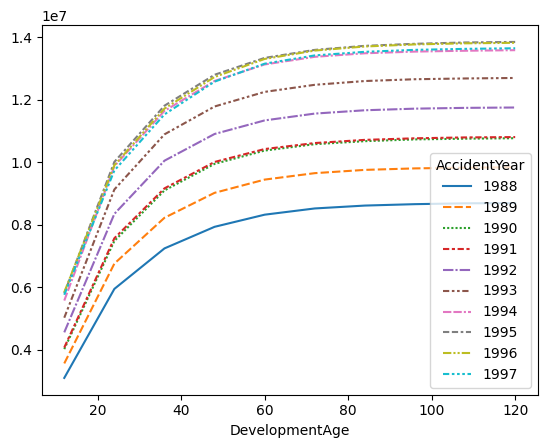

In [140]:
sns.lineplot(data=ppauto_pivot.T)

In [145]:
AvE = chain_ladder_square_df - ppauto_pivot
AvE

,12,24,36,48,60,72,84,96,108,120
1988,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1989,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.734962e+03
1990,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.391090e+03,7.739416e+02
1991,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.606575e+03,6.020044e+03,4.123113e+03
1992,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,9.549897e+03,1.803474e+04,2.476178e+04,2.363297e+04
1993,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,2.402543e+04,2.867426e+04,3.595577e+04,4.589661e+04,4.092541e+04
1994,0.0,0.000000,0.000000,0.000000e+00,1.255244e+04,3.684128e+04,5.820031e+04,7.357825e+04,8.369561e+04,7.726573e+04
1995,0.0,0.000000,0.000000,5.856073e+04,7.002172e+04,8.773877e+04,9.530051e+04,1.011315e+05,9.636761e+04,9.091211e+04
1996,0.0,0.000000,164383.323223,2.093988e+05,1.858847e+05,1.938825e+05,2.015846e+05,2.063790e+05,2.095037e+05,2.050454e+05
1997,0.0,660958.178332,944206.881307,1.004237e+06,1.011568e+06,1.036795e+06,1.066564e+06,1.078965e+06,1.086971e+06,1.080481e+06


In [146]:
AvE.stack()

1988  12     0.000000e+00
      24     0.000000e+00
      36     0.000000e+00
      48     0.000000e+00
      60     0.000000e+00
                 ...     
1997  72     1.036795e+06
      84     1.066564e+06
      96     1.078965e+06
      108    1.086971e+06
      120    1.080481e+06
Length: 100, dtype: float64

<Axes: >

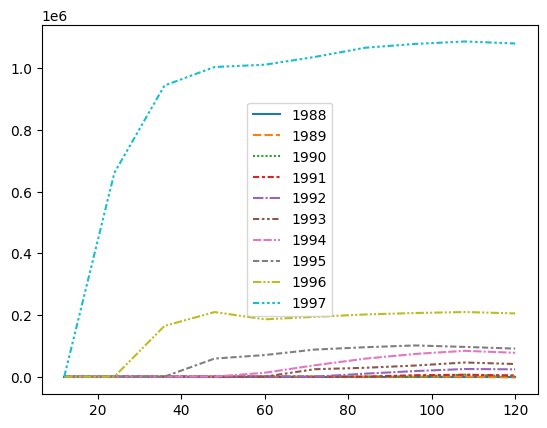

In [144]:
sns.lineplot(data=residuals.T)